<a href="https://colab.research.google.com/github/belenkf/10_11/blob/main/DS_FABBRIZI_TPFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

PRESENTACIÓN DEL DATASET

In [76]:
df = pd.read_csv('/content/drive/MyDrive/informacion-publica-respiratorias-nacional.csv')
df.head(10)

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,42,GENERAL SAN MART?N,14,Córdoba,2020,47,Enfermedad tipo influenza (ETI),5,5 a 9,1
1,42,GENERAL SAN MART?N,14,Córdoba,2020,47,Enfermedad tipo influenza (ETI),9,25 a 34,1
2,70,LA PAZ,30,Entre Ríos,2020,28,Enfermedad tipo influenza (ETI),3,12 a 23 m,1
3,70,LA PAZ,30,Entre Ríos,2020,28,Enfermedad tipo influenza (ETI),4,2 a 4,2
4,70,LA PAZ,30,Entre Ríos,2020,28,Enfermedad tipo influenza (ETI),5,5 a 9,1
5,70,LA PAZ,30,Entre Ríos,2020,28,Enfermedad tipo influenza (ETI),10,35 a 44,1
6,28,CAPITAL,54,Misiones,2021,9,Enfermedad tipo influenza (ETI),2,6 a 11 m,2
7,28,CAPITAL,54,Misiones,2021,9,Enfermedad tipo influenza (ETI),3,12 a 23 m,5
8,28,CAPITAL,54,Misiones,2021,9,Enfermedad tipo influenza (ETI),4,2 a 4,40
9,28,CAPITAL,54,Misiones,2021,9,Enfermedad tipo influenza (ETI),5,5 a 9,7


Éste dataset extrae resultados de epidemiología en patologías respiratorias en contexto o a nivel nacional en relación alos virus detectados en una brecha de tiempo y según la cantidad de casos y edades.

Diccionario y Objetivos:

Aqui se debe especificar el significado de cada columna del data set cargado y sus unidades.

Elegí el dataset del Ministerio de salud ya que quiero hacer algo diferente a lo que suelo manejar y desafiarme. No conozco los datos y espero poder recorrerlos y explorarlos con el objetivo de encontrarme con datos nuevos y familiarizarme con ellos, pudiendo pulirlos y tomar dimensión de que se tratan y para que nos sirven. también me planteo si serán suficientes y si pudiera agregar nuevos datos para futuras conclusiones, cuales serían??

Objetivos: ver promedio de edad en que se denotan las diferentes patologías.
Ver la diferencia o mapas de lugares de prevalencia.
Se correlacionan  las patologías respiratorias con los lugares más fríos del país o con los de mayor densidad de población?
Se podrá saber si hay zonas en relación a la vulnerabilidad/ clase social?


Exploración y visualización (EDA): conociendo el data set

In [41]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203730 entries, 0 to 203729
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   departamento_id          203730 non-null  int64 
 1   departamento_nombre      203730 non-null  object
 2   provincia_id             203730 non-null  int64 
 3   provincia_nombre         203730 non-null  object
 4   anio                     203730 non-null  int64 
 5   semanas_epidemiologicas  203730 non-null  int64 
 6   evento_nombre            203730 non-null  object
 7   grupo_edad_id            203730 non-null  int64 
 8   grupo_edad_desc          203730 non-null  object
 9   cantidad_casos           203730 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 15.5+ MB


el Dataset cuenta con 10 columnas con 203730 resultados y no hay faltantes, 4 son objetos o palabras, el resto son números

In [42]:
df.columns

Index(['departamento_id', 'departamento_nombre', 'provincia_id',
       'provincia_nombre', 'anio', 'semanas_epidemiologicas', 'evento_nombre',
       'grupo_edad_id', 'grupo_edad_desc', 'cantidad_casos'],
      dtype='object')

In [ ]:
df.notnull().sum()

departamento_id            203730
departamento_nombre        203730
provincia_id               203730
provincia_nombre           203730
anio                       203730
semanas_epidemiologicas    203730
evento_nombre              203730
grupo_edad_id              203730
grupo_edad_desc            203730
cantidad_casos             203730
dtype: int64

In [ ]:
df.shape

(203730, 10)

<Axes: title={'center': 'cantidad_casos'}>

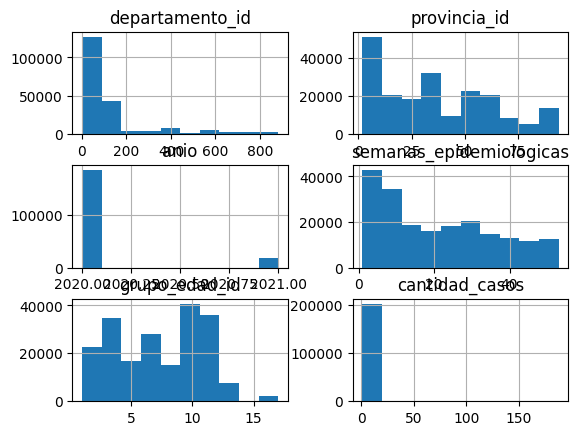

In [45]:
df.hist() # distribución de la variable
sns.boxplot() #identificación de outliers

In [43]:
df.describe()

,departamento_id,provincia_id,anio,semanas_epidemiologicas,grupo_edad_id,cantidad_casos
count,203730.000000,203730.000000,203730.000000,203730.000000,203730.000000,203730.000000
mean,131.297546,36.166338,2020.094660,21.039361,7.235851,2.250056
std,181.936717,26.261561,0.292745,15.113364,3.584929,3.108761
min,1.000000,2.000000,2020.000000,1.000000,1.000000,1.000000
25%,28.000000,10.000000,2020.000000,8.000000,4.000000,1.000000
50%,63.000000,30.000000,2020.000000,18.000000,7.000000,1.000000
75%,133.000000,54.000000,2020.000000,33.000000,10.000000,2.000000
max,882.000000,94.000000,2021.000000,53.000000,17.000000,188.000000


Éste describe me dice que los datos tienen una media de 131.2, una min de 1 en el año 2020.

In [4]:
df.tail(10)

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
203720,15,CONCORDIA,30,Entre Ríos,2020,7,Enfermedad tipo influenza (ETI),5,5 a 9,3
203721,15,CONCORDIA,30,Entre Ríos,2020,7,Enfermedad tipo influenza (ETI),6,10 a 14,1
203722,15,CONCORDIA,30,Entre Ríos,2020,7,Enfermedad tipo influenza (ETI),7,15 a 19,1
203723,35,CONFLUENCIA,58,Neuquén,2020,8,Enfermedad tipo influenza (ETI),9,25 a 34,1
203724,35,CONFLUENCIA,58,Neuquén,2020,8,Enfermedad tipo influenza (ETI),11,45 a 64,1
203725,21,CAPITAL,42,La Pampa,2020,11,Enfermedad tipo influenza (ETI),10,35 a 44,1
203726,63,LA CAPITAL,82,Santa Fe,2020,7,Enfermedad tipo influenza (ETI),8,20 a 24,1
203727,63,LA CAPITAL,82,Santa Fe,2020,7,Enfermedad tipo influenza (ETI),9,25 a 34,1
203728,63,LA CAPITAL,82,Santa Fe,2020,7,Enfermedad tipo influenza (ETI),12,65 a 74,2
203729,21,DIAMANTE,30,Entre Ríos,2020,11,Neumonía (sin especificar),12,65 a 74,1


NOTA: df.tail() es una herramienta útil para revisar rápidamente las últimas filas de un DataFrame en pandas y obtener información sobre cómo finalizan tus datos.

In [19]:
len(df['departamento_nombre'].unique())

396

describe que hay 396 departamentos en la lista de los mismos

para correlacionar que los strin sean correspondientes y se puedan enumerar

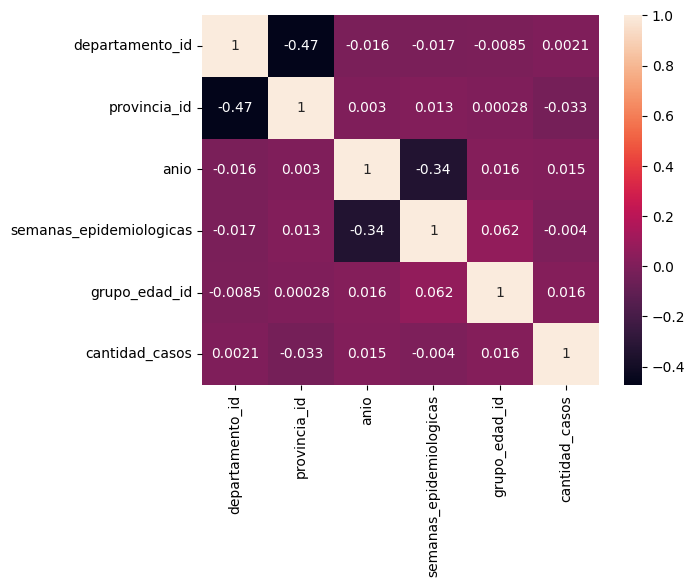

In [53]:
# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)
plt.show()

quiero identificar los departamentos

In [54]:
departamentos = df['departamento_nombre'].unique()
print(departamentos)

['GENERAL SAN MART?N' 'LA PAZ' 'CAPITAL' 'BERMEJO' 'UNI?N'
 'JUAN BAUTISTA ALBERDI' 'CURUZ? CUATI?' 'SARMIENTO' 'USHUAIA'
 'GOBERNADOR DUPUY' 'GUALEGUAY' 'DR. MANUEL BELGRANO'
 'LIBERTADOR GENERAL SAN MART?N' 'R?O GRANDE' 'A?ELO' 'AVELLANEDA'
 'Z?RATE' 'BELGRANO' 'RAM?N LISTA' 'GENERAL VILLEGAS' 'ALBERDI'
 'SAN MIGUEL' 'SAN MART?N' 'ALMIRANTE BROWN' 'SAN FERNANDO' 'COMUNA 5'
 'LA PLATA' 'LIBERTADOR GRL. SAN MART?N' 'SAN ANDR?S DE GILES'
 'LEANDRO N. ALEM' 'CHACABUCO' 'SALADAS' 'RIVADAVIA' 'GENERAL ALVEAR'
 'MONTEROS' 'CHILECITO' 'SAN PEDRO' 'TAF? DEL VALLE' 'GENERAL ROCA'
 'LAGO ARGENTINO' 'AZUL' 'SANTA MAR?A' '25 DE MAYO' 'DESEADO'
 'CASTELLANOS' 'SAN RAFAEL' 'PICHI MAHUIDA' 'SAN CARLOS' 'JUN?N' 'PEHUAJ?'
 'ESCOBAR' 'CARLOS CASARES' 'LAS HERAS' 'R?O SEGUNDO' 'L?CAR' 'LAISHI'
 'SAN IGNACIO' 'LA CAPITAL' 'FEDERACI?N' 'ROSARIO' 'GENERAL LAS HERAS'
 'ISLAS DEL IBICUY' 'OR?N' 'PARAN?' 'GENERAL GUIDO' 'PELLEGRINI' 'PILAG?S'
 'JU?REZ CELMAN' 'PRESIDENTE PER?N' 'IGUAZ?' 'INDEPENDENCIA' 'SAN R

quiero identificar las provincias

In [55]:
provincias = df['provincia_nombre'].unique()
print(provincias)


['Córdoba' 'Entre Ríos' 'Misiones' 'Chaco' 'Tucumán' 'Corrientes'
 'San Juan' 'Tierra del Fuego' 'San Luis' 'Jujuy' 'Neuquén' 'Río Negro'
 'Buenos Aires' 'Formosa' 'Santiago del Estero' 'Salta' 'CABA' 'Mendoza'
 'La Rioja' 'Santa Cruz' 'Santa Fe' 'Catamarca' 'Chubut' 'La Pampa']


es un sondeo en todo el país, quisiera saber si hay código por provincia según el departamento y hacer un listado

In [22]:

# This dictionary can be created manually or extracted from another data source.
province_to_department = {
    "Buenos Aires": "Buenos Aires",
    "Catamarca": "Catamarca",
    "Chaco": "Chaco",
    "Chubut": "Chubut",
    "Córdoba": "Córdoba",
    "Corrientes": "Corrientes",
    "Entre Ríos": "Entre Ríos",
    "Formosa": "Formosa",
    "Jujuy": "Jujuy",
    "La Pampa": "La Pampa",
    "La Rioja": "La Rioja",
    "Mendoza": "Mendoza",
    "Misiones": "Misiones",
    "Neuquén": "Neuquén",
    "Río Negro": "Río Negro",
    "Salta": "Salta",
    "San Juan": "San Juan",
    "San Luis": "San Luis",
    "Santa Cruz": "Santa Cruz",
    "Santa Fe": "Santa Fe",
    "Santiago del Estero": "Santiago del Estero",
    "Tierra del Fuego": "Tierra del Fuego",
    "Tucumán": "Tucumán"

}

# Now, we can create a new column in the DataFrame that contains the department name for each province.
df["department_name"] = df["provincia_nombre"].map(province_to_department)

# Finally, we can group the DataFrame by department and count the number of cases in each department.
department_cases = df.groupby("department_name").size()

# Print the list of departments and their corresponding number of cases.
for department, cases in department_cases.items():
    print(f"{department}: {cases}")


Buenos Aires: 42399
Catamarca: 7230
Chaco: 16745
Chubut: 1981
Corrientes: 10983
Córdoba: 9917
Entre Ríos: 14075
Formosa: 6514
Jujuy: 11399
La Pampa: 1474
La Rioja: 8258
Mendoza: 6864
Misiones: 15863
Neuquén: 2837
Río Negro: 9540
Salta: 8070
San Juan: 5457
San Luis: 3181
Santa Cruz: 2414
Santa Fe: 3184
Santiago del Estero: 3676
Tierra del Fuego: 580
Tucumán: 9350


quiero hacer un describe de los datos por provincia

In [16]:
department_cases.describe()

count       23.000000
mean      8782.217391
std       8634.558277
min        580.000000
25%       3182.500000
50%       7230.000000
75%      10450.000000
max      42399.000000
dtype: float64

la media de casos por provincia es de 8782,la mediana de 580 QUE VAN DESDE 3182 AL25% AL 10450 AL 75% Y LOS VOY A VER REPRESENTADOS EN UNA CAJA DE BIGOTES

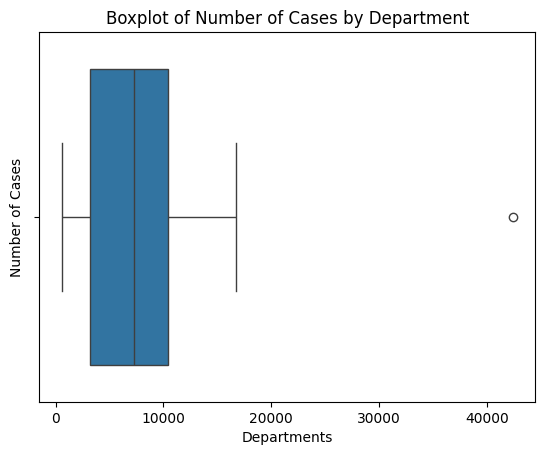

In [73]:
# prompt: hacer una caja de bigotes con ese ultimo describe

import matplotlib.pyplot as plt
sns.boxplot(x=department_cases)
plt.xlabel("Departments")
plt.ylabel("Number of Cases")
plt.title("Boxplot of Number of Cases by Department")
plt.show()


quiero conocer los eventos

In [46]:
# prompt: agrupar los eventos por nombre y según la cantidad de casos

grouped_events = df.groupby('evento_nombre')['evento_nombre'].count().sort_values(ascending=False)

print(grouped_events)


evento_nombre
Enfermedad tipo influenza (ETI)                         159504
Neumonía (sin especificar)                               28214
Bronquiolitis en menores de 2 años (sin especificar)     16012
Name: evento_nombre, dtype: int64


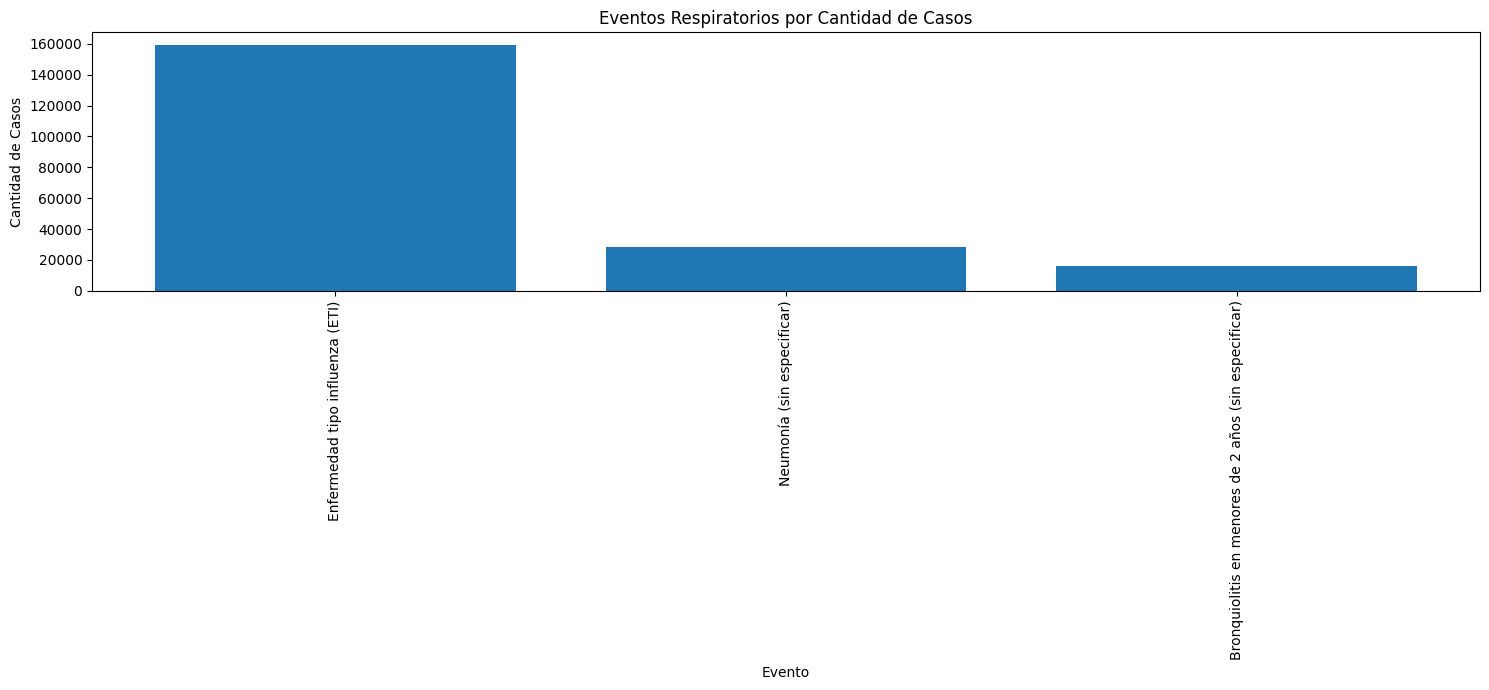

In [47]:
# prompt: realizar un gráfico con dichos datos

import matplotlib.pyplot as plt

# Prepare data
x = grouped_events.index.to_list()
y = grouped_events.values.tolist()

# Create bar chart
plt.figure(figsize=(15, 7))
plt.bar(x, y)

# Customize chart
plt.title('Eventos Respiratorios por Cantidad de Casos')
plt.xlabel('Evento')
plt.ylabel('Cantidad de Casos')
plt.xticks(rotation=90)

# Display chart
plt.tight_layout()
plt.show()


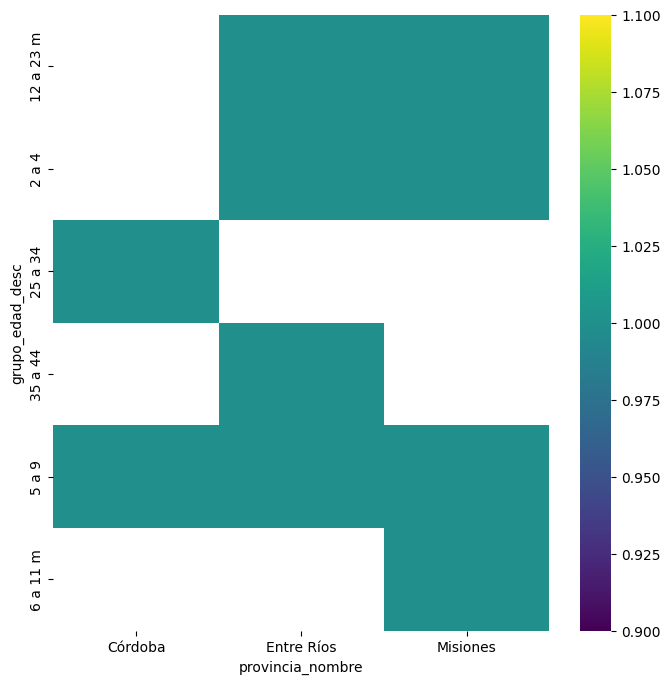

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['grupo_edad_desc'].value_counts()
    for x_label, grp in _df_32.groupby('provincia_nombre')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('provincia_nombre')
_ = plt.ylabel('grupo_edad_desc')

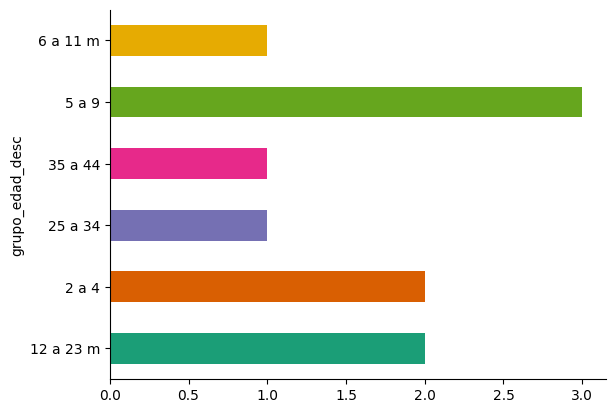

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_18.groupby('grupo_edad_desc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-36-d87bcbe02369>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_35, x='departamento_id', y='grupo_edad_desc', inner='stick', palette='Dark2')


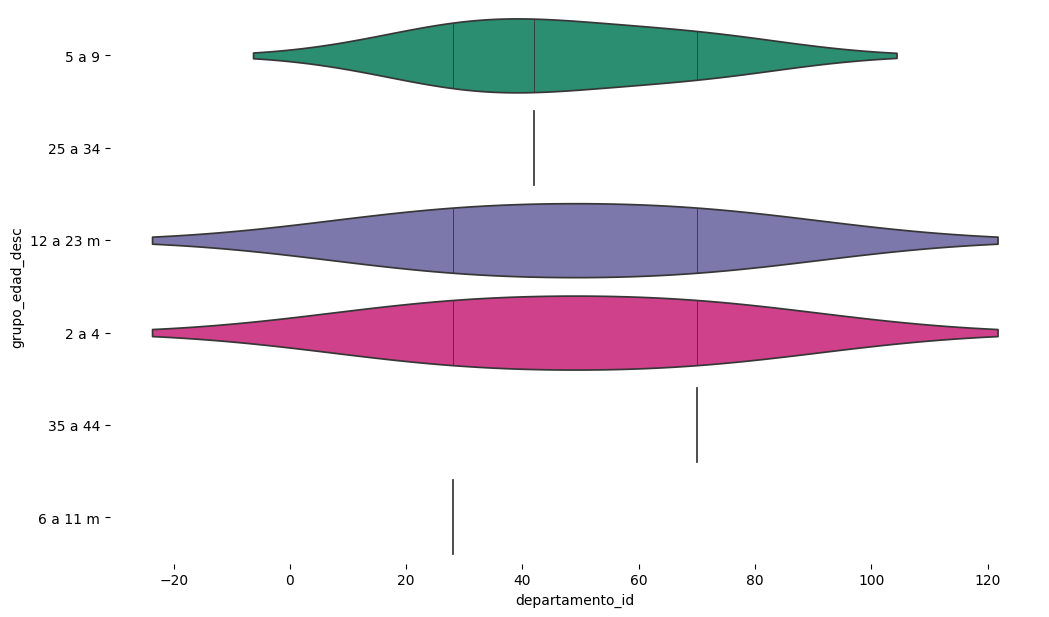

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_35['grupo_edad_desc'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_35, x='departamento_id', y='grupo_edad_desc', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

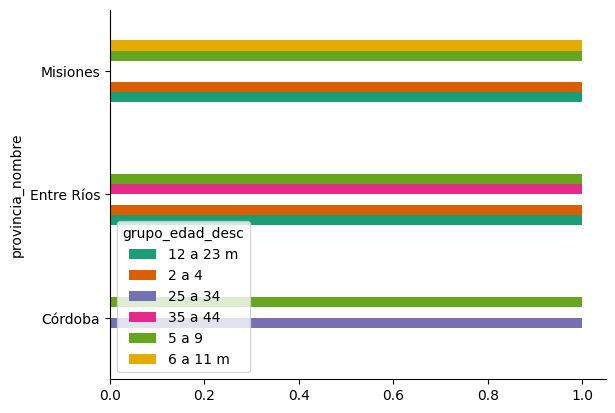

In [28]:
# prompt: COMO CORRIJO ESE G´RAFICO PARA QUE QUEDE ORDENADO POR EDAD Y POR PROVINCIA?

import matplotlib.pyplot as plt
_df_18.groupby(['provincia_nombre', 'grupo_edad_desc']).size().unstack().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


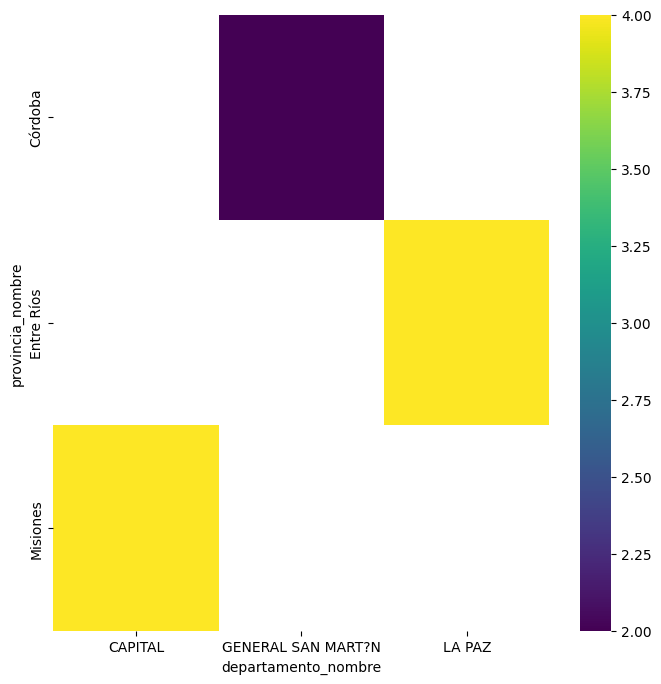

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['provincia_nombre'].value_counts()
    for x_label, grp in _df_31.groupby('departamento_nombre')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('departamento_nombre')
_ = plt.ylabel('provincia_nombre')


<ipython-input-32-14dd21d49022>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_18['grupo_edad_letra'] = np.select(


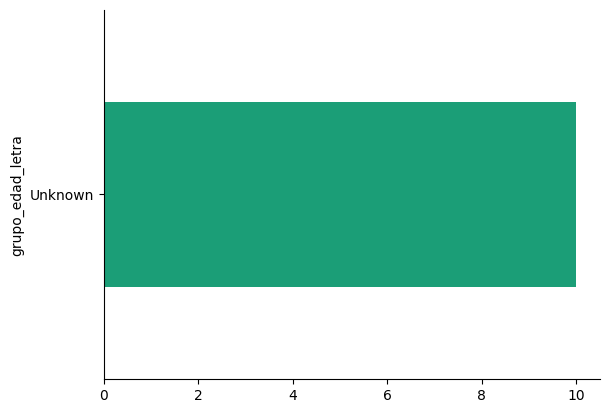

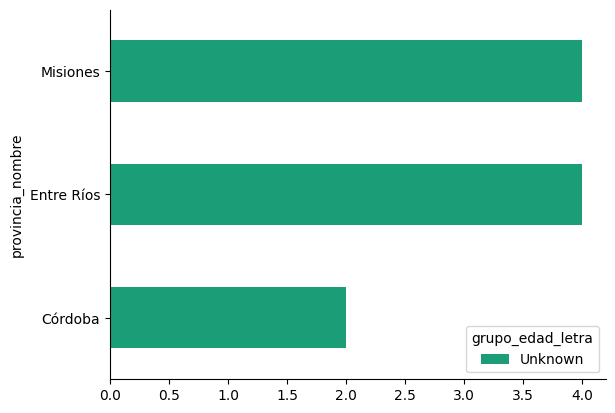

In [32]:
# prompt: QUIERO QUE PORNGAS COMO GRUPOS POR LETRA A LAS DIFERENTES EDADES AGRUPANDO A 6 A 11 M COMO GRUPO A, DE 12 A 23 COMO GRUPO B, DE 2 A 4 AÑOS COMO GRUPO C Y DE 5 A 9 COMO GRUPO D

import matplotlib.pyplot as plt
import numpy as np
_df_18['grupo_edad_letra'] = np.select(
    [
        (_df_18['grupo_edad_desc'] == '6 a 11 Meses'),
        (_df_18['grupo_edad_desc'] == '1 a 2 Años'),
        (_df_18['grupo_edad_desc'] == '2 a 4 Años'),
        (_df_18['grupo_edad_desc'] == '5 a 9 Años'),
    ],
    [
        'A',  # Grupo A
        'B',  # Grupo B
        'C',  # Grupo C
        'D',  # Grupo D
    ],
    default='Unknown'
)

_df_18.groupby('grupo_edad_letra').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

_df_18.groupby(['provincia_nombre', 'grupo_edad_letra']).size().unstack().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


haré una correlación para saber si los datos tienen sentido

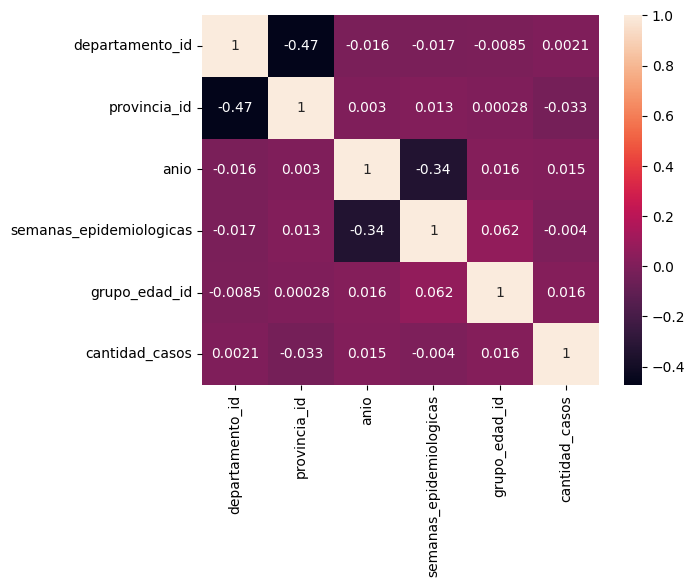

In [74]:
# Visualiza la matriz de correlación usando un mapa de calor
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


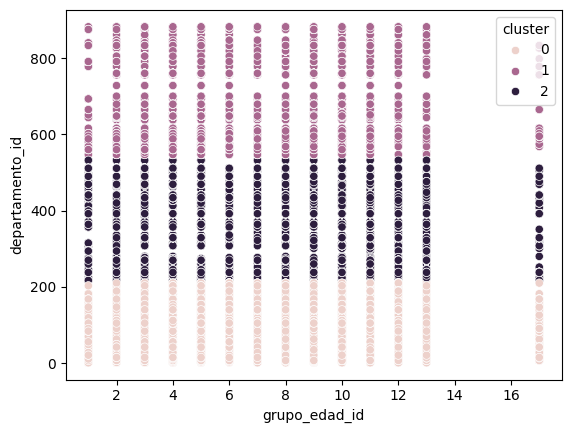

In [63]:
#AGRUPAMIENTO:
#Selecciona las variables relevantes para el agrupamiento
features = df[['grupo_edad_id', 'provincia_id', 'departamento_id']]

# Aplica un algoritmo de agrupamiento, como K-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)

# Agrega las etiquetas de los grupos al DataFrame
df['cluster'] = kmeans.labels_

# Visualiza los grupos
sns.scatterplot(x='grupo_edad_id', y='departamento_id', hue='cluster', data=df)
plt.show()

voy a graficar la cantidad de casos de cada eventos respiratorios a lo largo de los años para comprender que evento tiene más reelevancia según la edad:

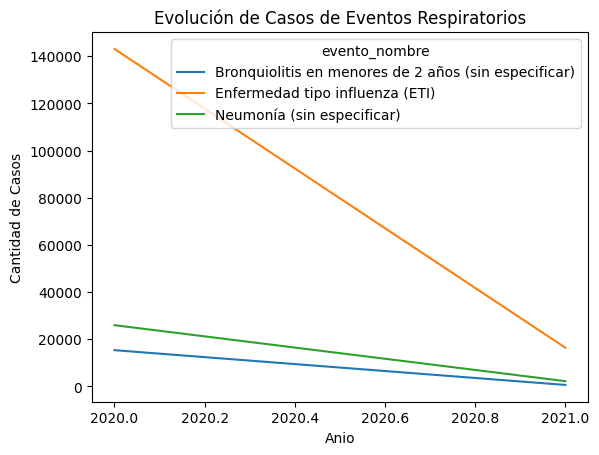

In [64]:
# Agrupa los datos por año y evento, y cuenta los casos
grouped_events_by_year = df.groupby(['anio', 'evento_nombre'])['evento_nombre'].count().unstack()

# Grafica la evolución de los casos
grouped_events_by_year.plot(kind='line')
plt.title('Evolución de Casos de Eventos Respiratorios')
plt.xlabel('Anio')
plt.ylabel('Cantidad de Casos')
plt.show()

**CONCLUSIÓN**

Para ampliar el análisis y obtener información más detallada, se podría:

1. Explorar más variables:

Variables geográficas: Analizar la distribución de casos por provincia, departamento o región. Utilizar mapas para visualizar la concentración geográfica de las enfermedades respiratorias.
Variables demográficas: Estudiar la relación entre las enfermedades respiratorias y variables como sexo, edad, nivel socioeconómico, acceso a servicios de salud, etc.
Variables ambientales: Investigar la posible influencia de factores ambientales como la contaminación del aire, la temperatura, la humedad, etc.
Variables temporales: Analizar la evolución de los casos a lo largo del tiempo, identificando patrones estacionales o tendencias a largo plazo.
2. Aplicar diferentes técnicas estadísticas:

Modelos de regresión: Para estudiar la relación entre las enfermedades respiratorias y diferentes variables predictoras.
Análisis de series temporales: Para analizar la evolución de los casos a lo largo del tiempo y realizar predicciones.
Análisis de supervivencia: Para estudiar el tiempo hasta la ocurrencia de un evento, como la hospitalización o el fallecimiento, en relación con diferentes variables.
3. Realizar pruebas adicionales:

Pruebas de hipótesis: Para comparar grupos y determinar si existen diferencias significativas en la incidencia de enfermedades respiratorias.
Pruebas de asociación: Para identificar relaciones entre diferentes variables categóricas.
4. Considerar la incorporación de datos externos:

Datos climáticos: Para analizar la influencia de factores climáticos en las enfermedades respiratorias.
Datos socioeconómicos: Para estudiar la relación entre la incidencia de enfermedades respiratorias y la vulnerabilidad social.

Para estudiar la relación entre la edad y la incidencia de diferentes eventos respiratorios, podrías realizar un análisis de regresión logística:

In [66]:
import statsmodels.api as sm

# Crea una variable dummy para cada evento respiratorio
for evento in df['evento_nombre'].unique():
    df[evento] = (df['evento_nombre'] == evento).astype(int)

# Ajusta un modelo de regresión logística para cada evento
for evento in df['evento_nombre'].unique():
    X = df[['grupo_edad_id']]
    y = df[evento]
    X = sm.add_constant(X)
    model = sm.Logit(y, X).fit()
    print(f"Modelo para {evento}:")
    print(model.summary())

Optimization terminated successfully.
         Current function value: 0.517981
         Iterations 5
Modelo para Enfermedad tipo influenza (ETI):
                                  Logit Regression Results                                 
Dep. Variable:     Enfermedad tipo influenza (ETI)   No. Observations:               203730
Model:                                       Logit   Df Residuals:                   203728
Method:                                        MLE   Df Model:                            1
Date:                             Tue, 16 Jul 2024   Pseudo R-squ.:                0.009954
Time:                                     23:45:36   Log-Likelihood:            -1.0553e+05
converged:                                    True   LL-Null:                   -1.0659e+05
Covariance Type:                         nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------